Subject id: 10


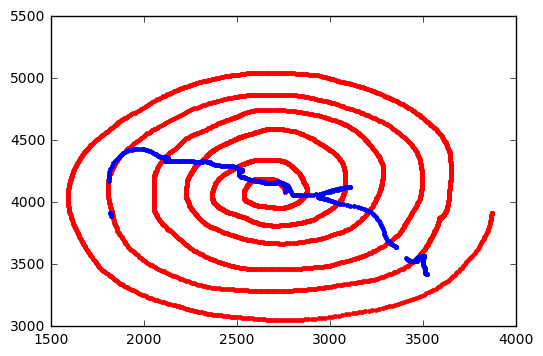

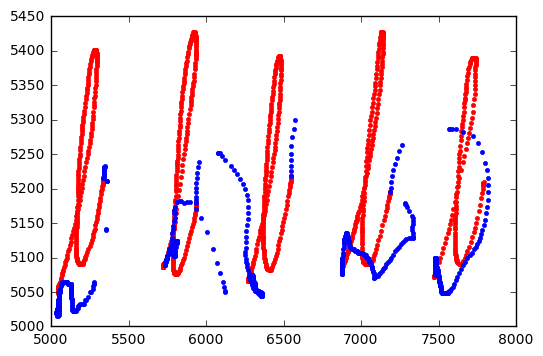

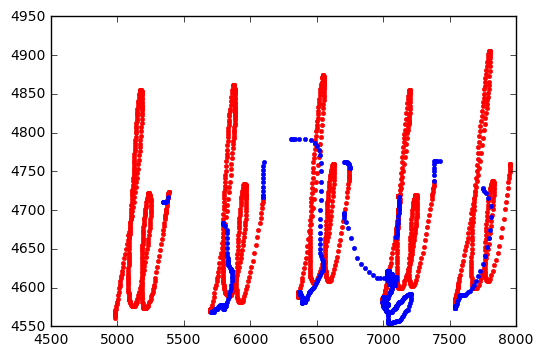

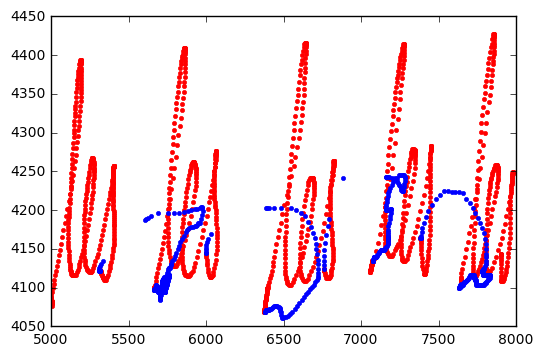

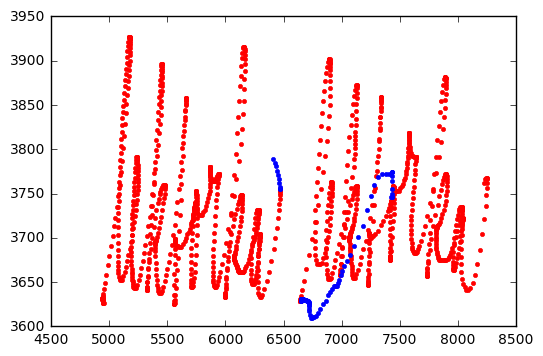

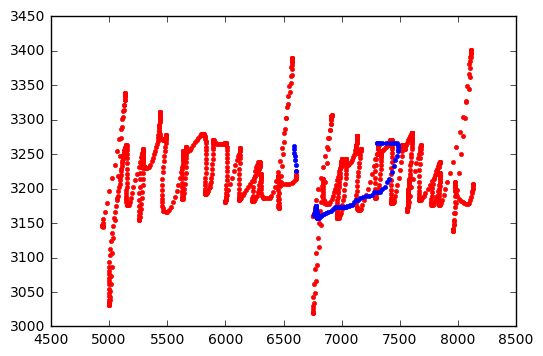

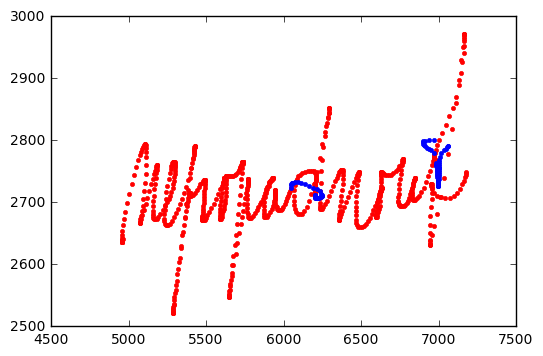

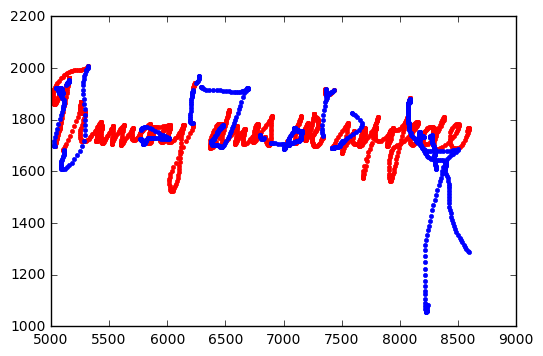

Subject id: 34


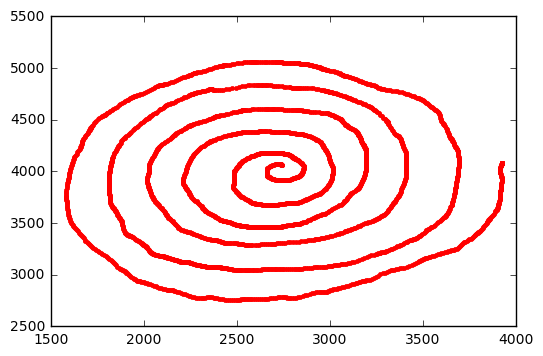

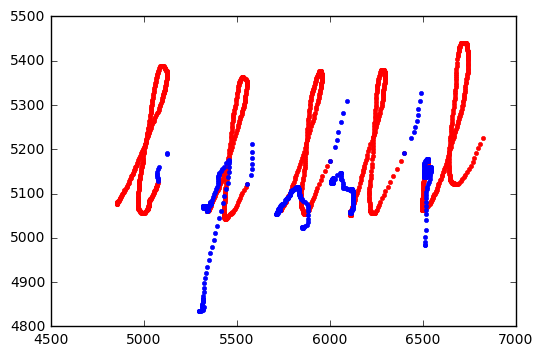

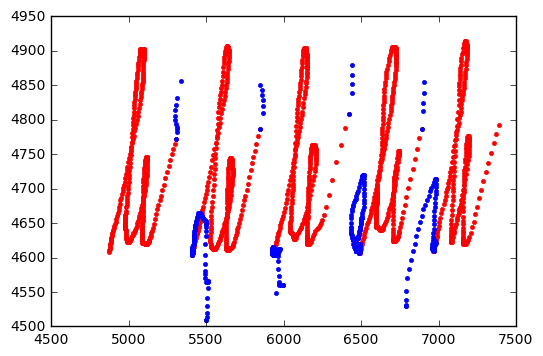

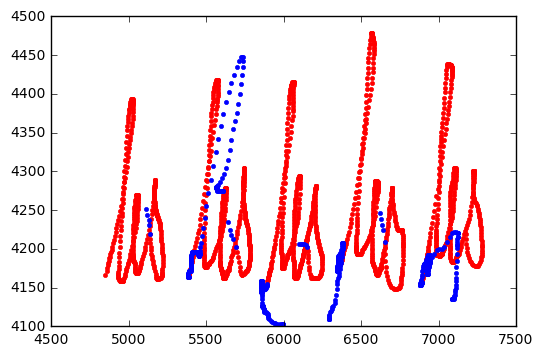

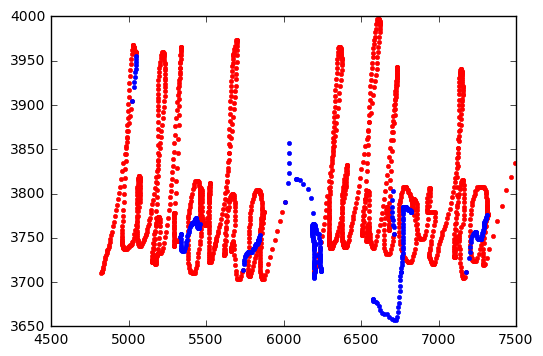

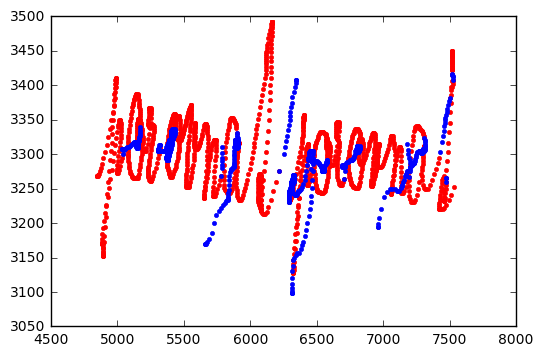

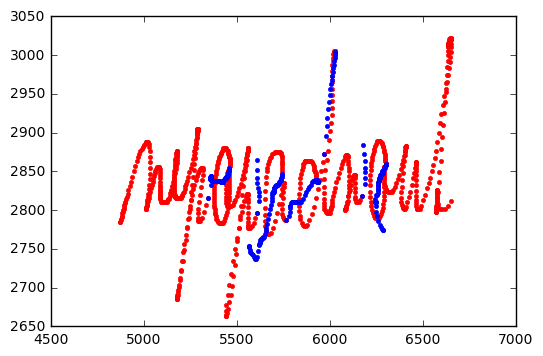

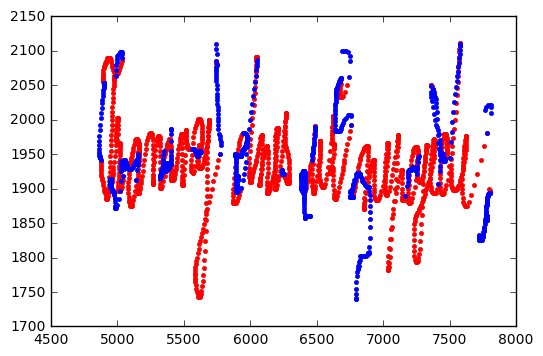

In [ ]:
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def main():
    base_dir = os.path.dirname('.')
    file_format = os.path.join(base_dir, 'PaHaW', 'PaHaW_public', '{test_number:05d}', 
                              '{test_number:05d}__{test_id}_1.svc')
    header = ['y', 'x', 'timestamp', 'on_surface', 'azimuth', 'altitude', 'pressure']

    while True:
        subject_id = int(raw_input('Subject id: '))
        if subject_id <= 1:
            print "Exit the program..."
            return

        for test_id in range(1, 9):
            file_path = file_format.format(test_number=subject_id, test_id=test_id)

            try:
                data = np.genfromtxt(file_path, delimiter=' ', skip_header=1, names=header)
            except IOError as e:
                print e
                break

            writting_on_surface = data[data['on_surface'] == 1]
            writting_on_air = data[data['on_surface'] != 1]

            plt.figure()

            plt.plot(writting_on_surface['x'], writting_on_surface['y'], '.r')
            plt.plot(writting_on_air['x'], writting_on_air['y'], '.b')

            plt.show()

if __name__ == '__main__':
    main()